In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [11]:
df = pd.read_csv("../mushrooms.csv")
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
df.shape

(8124, 23)

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df["veil-type"].nunique()

1

# The veil type column seems to have a single unique value. It will not be useful later on, I will simply drop the column

In [13]:
df.drop(columns = "veil-type", axis = 1, inplace = True)

In [14]:
df.shape

(8124, 22)

In [16]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

# Let's perform some Univariate and Bivariate data visualization 

In [22]:
#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

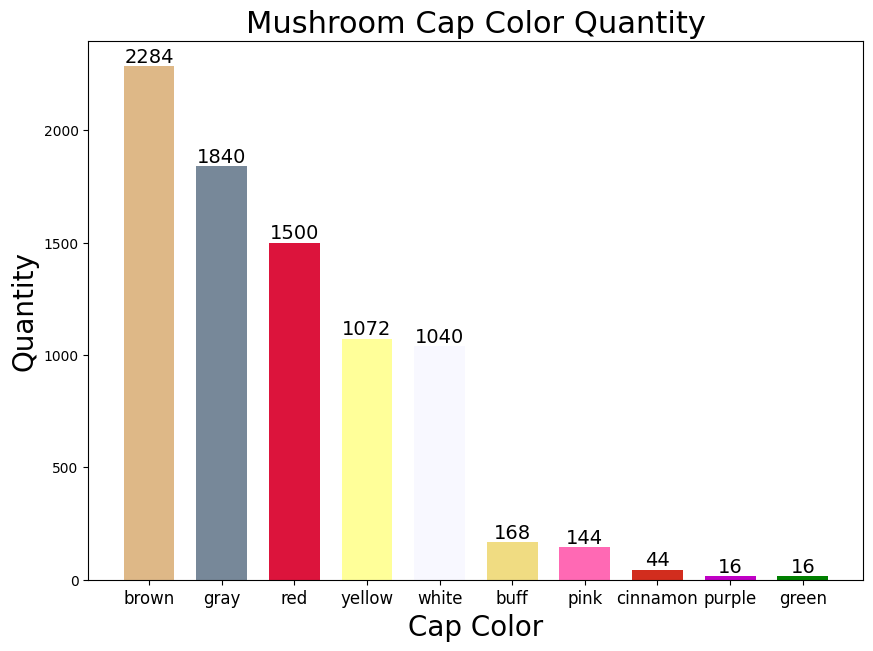

In [42]:
#Obtain total number of mushrooms for each 'cap-color'
cap_colors = df['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparation and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)


autolabel(mushroom_bars)        
plt.show()

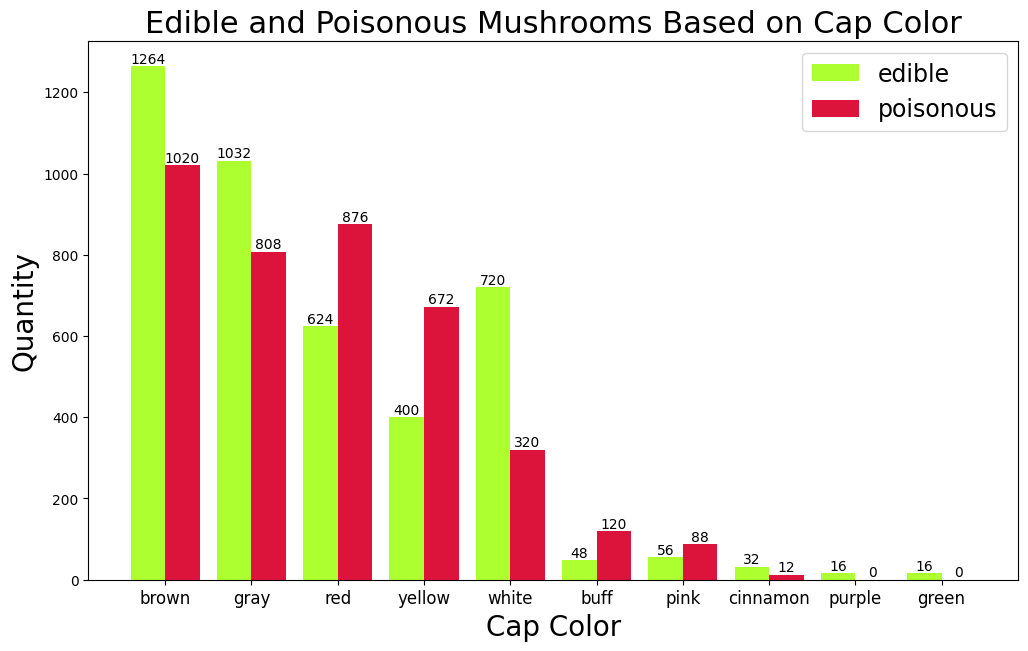

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16] number of edible shrooms
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0] number of poisonus shrooms


In [41]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(df[df['cap-color'] == capColor].index)
    edibles = len(df[(df['cap-color'] == capColor) & (df['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparation and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F') #plotting the edible class in green
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DC143C') #plotting the poisonus class in red

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(f"{edible_cc} number of edible shrooms")
print(f"{poisonous_cc} number of poisonus shrooms")

# Insights:
 - We can clearly see that the cap color has a relevant importance, especially for certain colors, on the clasification result;
 - Purple and green cap color shrooms are always edibles, according to this dataset; 
 - Yellow, red, buff and pink capcolor are more likely to be poisonous;
 - Brown, gray, white and cinnamon capcolors are more likely to be edibles.

### Let's continue our analysis

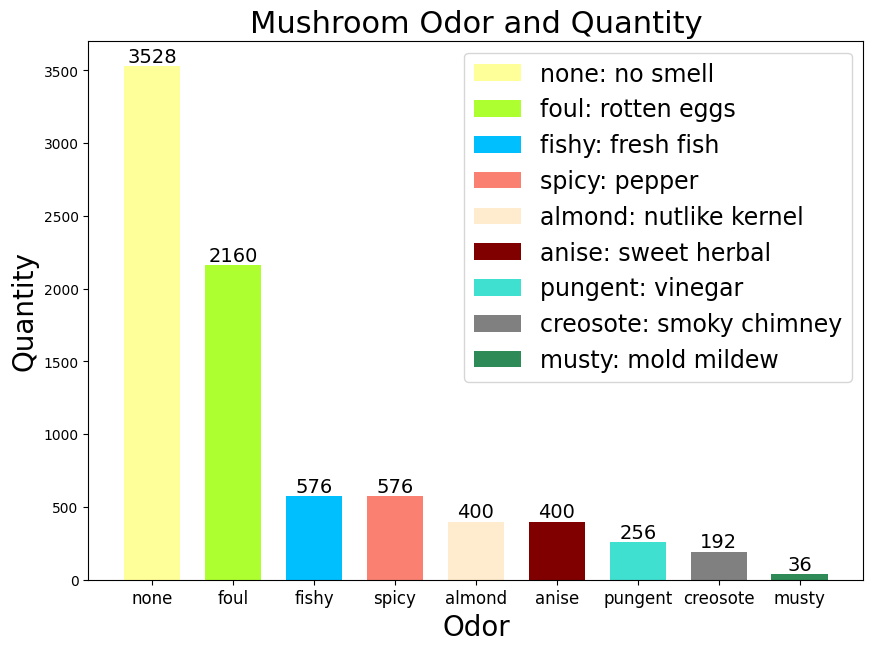

In [28]:
#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odors = df['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#=====PLOT Preparations and Plotting====#
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show()

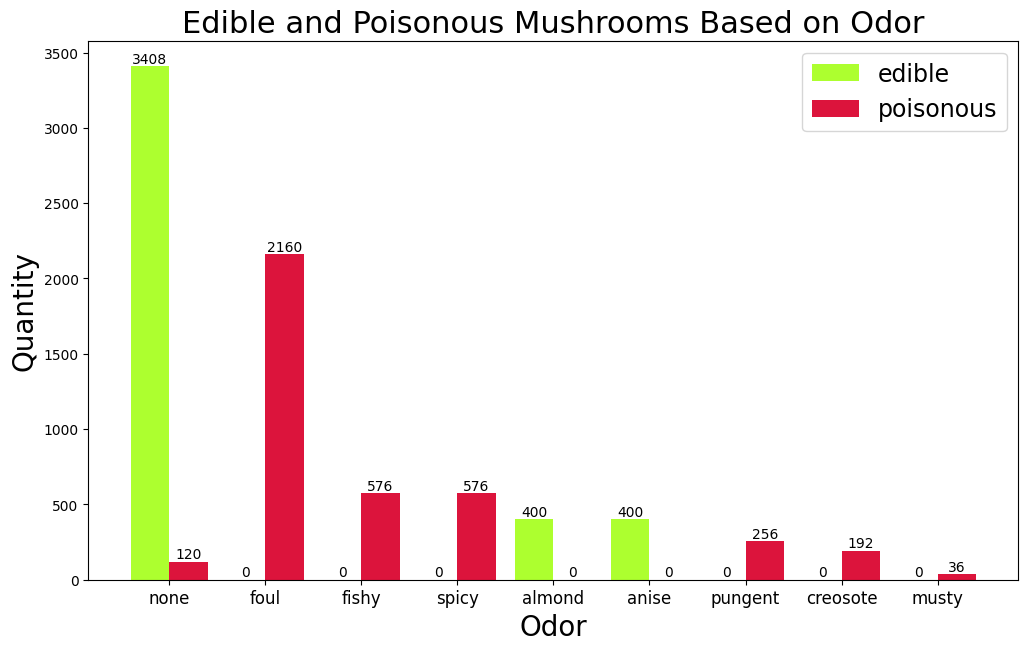

[3408, 0, 0, 0, 400, 400, 0, 0, 0] number of edible shrooms based on odor
[120, 2160, 576, 576, 0, 0, 256, 192, 36] number of poisonus shrooms based on odor


In [30]:
poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(df[df['odor'] == odor].index)
    edibles = len(df[(df['odor'] == odor) & (df['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DC143C')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(f"{edible_od} number of edible shrooms based on odor")
print(f"{poisonous_od} number of poisonus shrooms based on odor")

# Insights:
 - The odor of the mushrooms also play a relevant role;
 - Almond and anise smells always result in an edible shroom;
 - Foul, fishy, spicy, pungent, creosote and musty smells always result to be poisonous;
 - If the mushroom has no smell, it is very likely to be edible

### Let's go on

In [45]:
no_smell_df = df[df.odor == 'n']
no_smell_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
14,e,x,f,n,f,n,f,w,b,n,...,s,f,w,w,w,o,e,k,a,g
15,e,s,f,g,f,n,f,c,n,k,...,s,s,w,w,w,o,p,n,y,u
16,e,f,f,w,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
28,e,f,f,n,f,n,f,c,n,k,...,s,s,w,w,w,o,p,k,y,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l


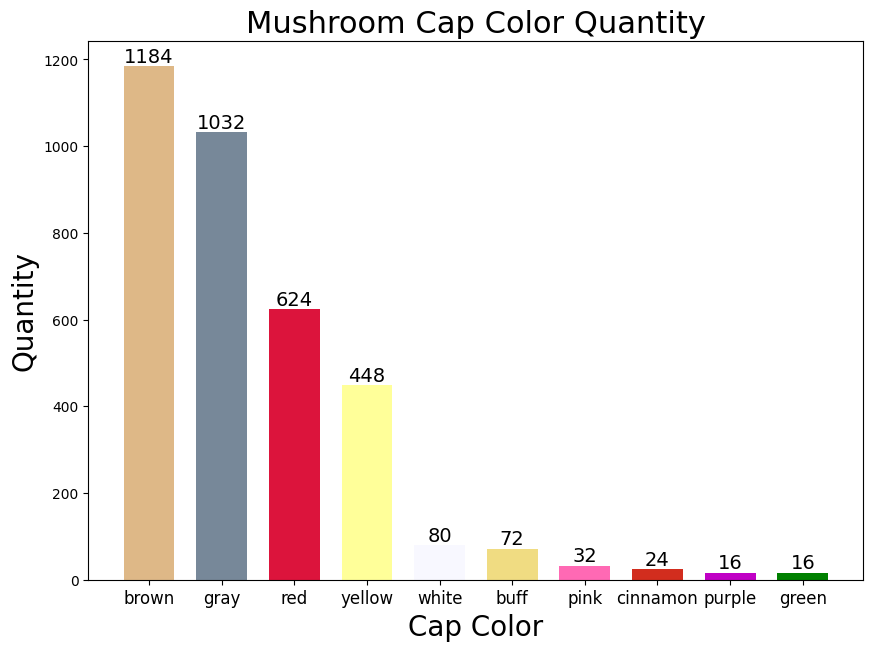

In [46]:
#Obtain total number of mushrooms for each 'cap-color'
cap_colors = no_smell_df['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparation and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)


autolabel(mushroom_bars)        
plt.show()

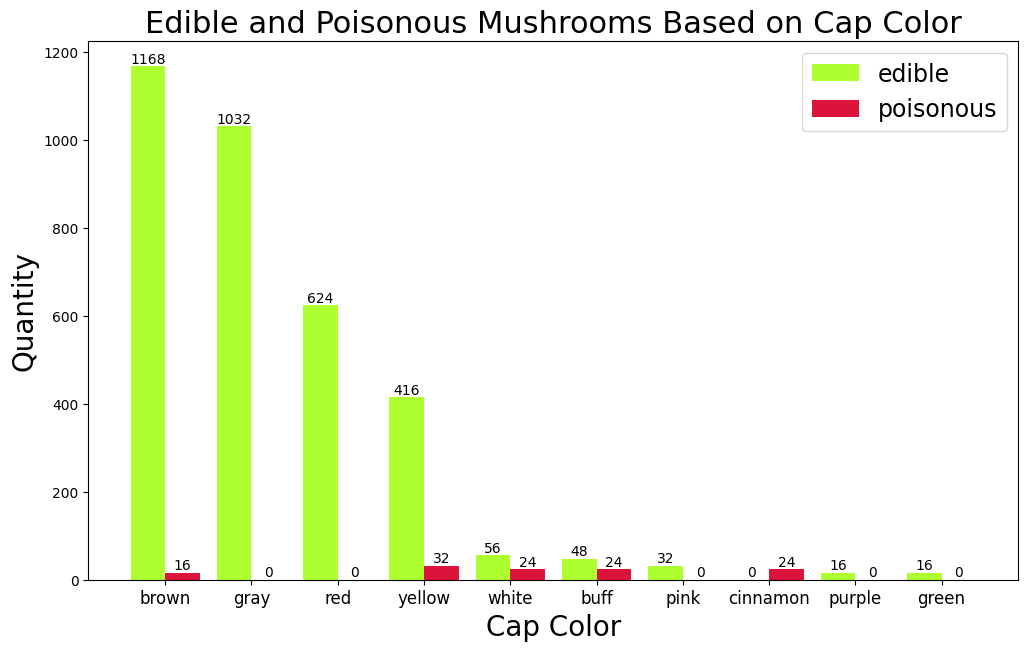

[1168, 1032, 624, 416, 56, 48, 32, 0, 16, 16] number of edible shrooms
[16, 0, 0, 32, 24, 24, 0, 24, 0, 0] number of poisonus shrooms


In [47]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(no_smell_df[no_smell_df['cap-color'] == capColor].index)
    edibles = len(no_smell_df[(no_smell_df['cap-color'] == capColor) & (no_smell_df['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparation and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F') #plotting the edible class in green
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DC143C') #plotting the poisonus class in red

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(f"{edible_cc} number of edible shrooms")
print(f"{poisonous_cc} number of poisonus shrooms")

# Insight:
 - It is clear that if we start to correlate two different features, in this case the odor = None and the color cap, we have suddenly a clear picture.

### Let's continue the analysis on other types of features

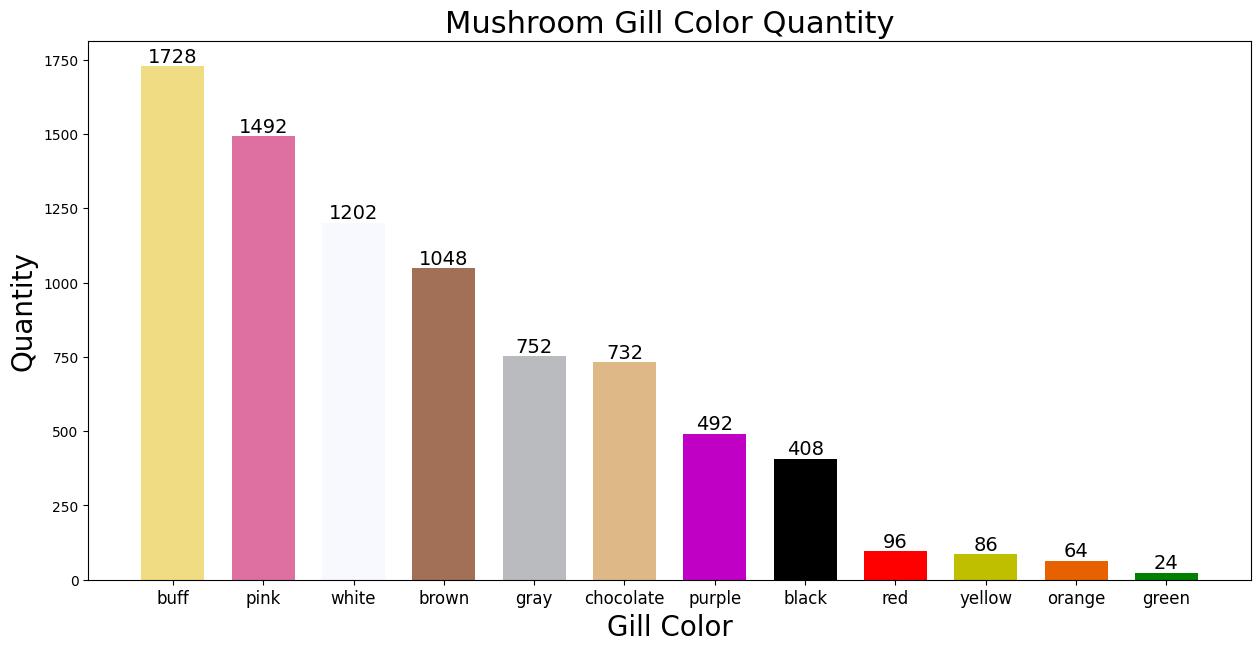

In [49]:
#Obtain total number of mushrooms for each 'gill-color'
gill_colors = df['gill-color'].value_counts() #it gives me also the color classification
m_height = gill_colors.values.tolist() #Provides numerical values
gill_colors.axes #Provides row labels
gill_color_labels = gill_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(12)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#F0DC82','#de70a1','#f8f8ff','#a27056','#b9bbbe','#DEB887','#C000C5','k','r','y','#e86100','g']
('buff','pink','white','brown','gray','chocolate','purple','black','red','yellow','orange','green' ),
#FFFFF0
fig, ax = plt.subplots(figsize=(15,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Gill Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('buff','pink','white','brown','gray','chocolate','purple','black','red','yellow','orange','green' ),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show()

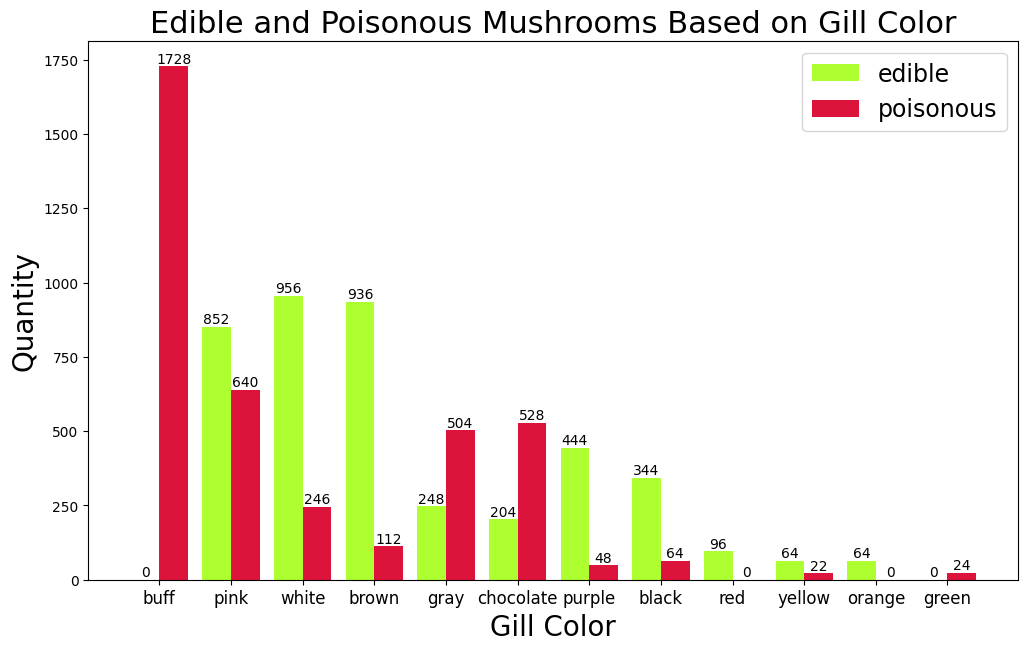

[0, 852, 956, 936, 248, 204, 444, 344, 96, 64, 64, 0] number of edible shrooms based on gill colors
[1728, 640, 246, 112, 504, 528, 48, 64, 0, 22, 0, 24] number of poisonus shrooms based on gill colors


In [51]:
poisonous_gill_col = [] #Poisonous gill col list
edible_gill_col = []    #Edible gill col list
for gill_col in gill_color_labels:
    size = len(df[df['gill-color'] == gill_col].index)
    edibles = len(df[(df['gill-color'] == gill_col) & (df['class'] == 'e')].index)
    edible_gill_col.append(edibles)
    poisonous_gill_col.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_gill_col , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_gill_col , width, color='#DC143C')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Gill Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('buff','pink','white','brown','gray','chocolate','purple','black','red','yellow','orange','green' ),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(f"{edible_gill_col} number of edible shrooms based on gill colors")
print(f"{poisonous_gill_col} number of poisonus shrooms based on gill colors")

# Insights:
 - Here we can draw similar conclusions... DO NOT EAT MUSHROOMS WITH BUFF GILL COLOR!! :)

### Let's try different types of analysis

[4040, 1712, 1248, 400, 384, 340]


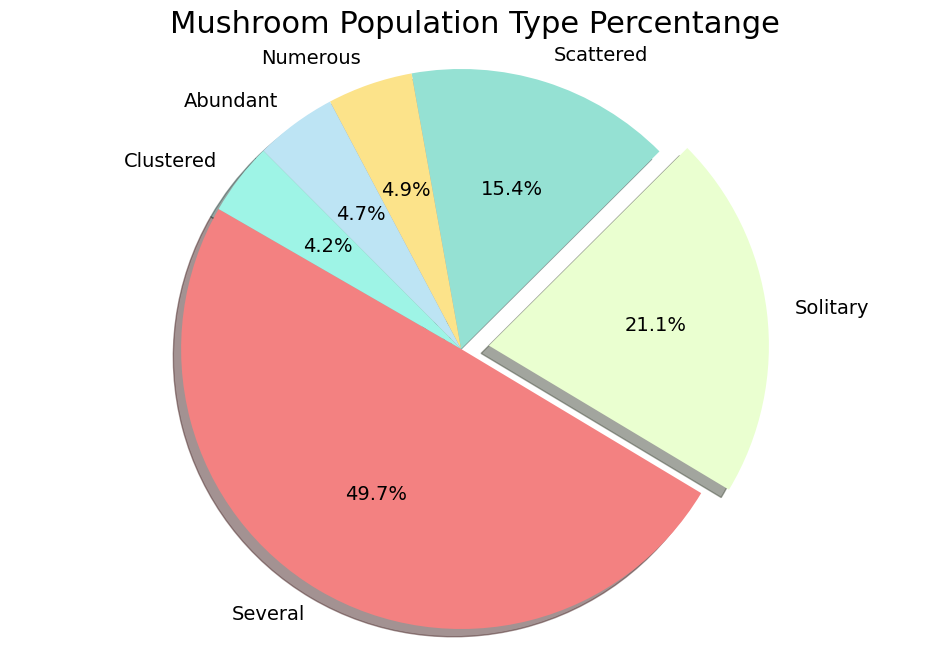

In [53]:
#Get the population types and its values for Single Pie chart
populations = df['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 2nd slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

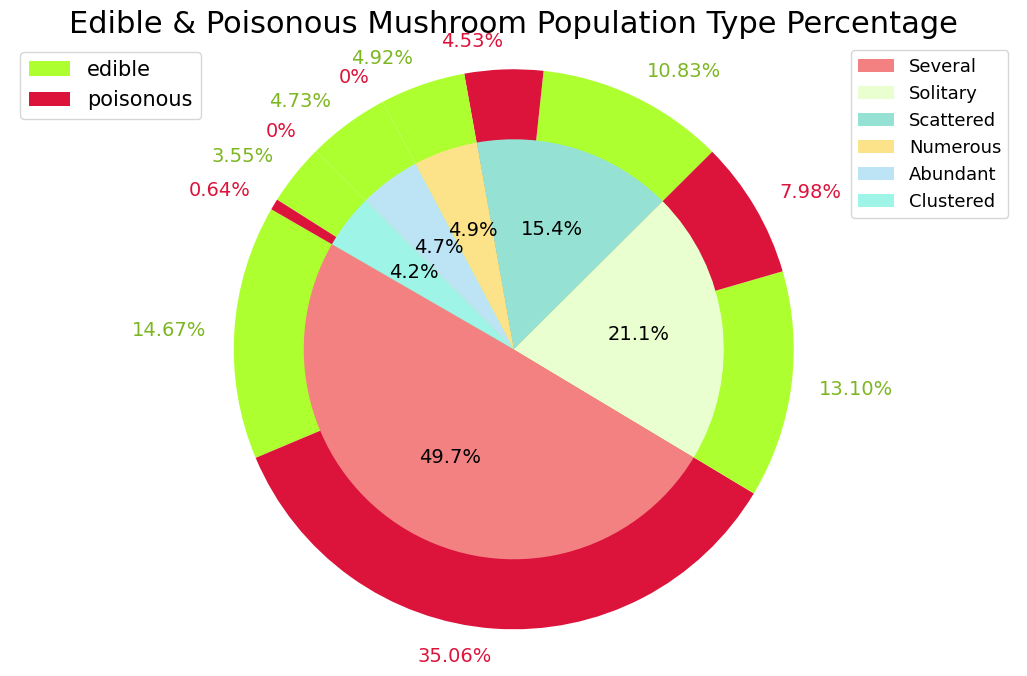

In [55]:
#DOUBLE PIE CHART
poisonous_pop = [] #Poisonous population type list
edible_pop = []    #Edible population type list
for pop in pop_types: 
    size = len(df[df['population'] == pop].index)
    edibles = len(df[(df['population'] == pop) & (df['class'] == 'e')].index)
    edible_pop.append(edibles) #Gets edibles
    poisonous_pop.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_pop)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])
#print(edible_pop) print(poisonous_pop) print(combine_ed_poi)

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Population Type Percentage', fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p,
                                colors=['#ADFF2F','#DC143C'], startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') #Color % labels with dark green
    else:
        texts1[i].set_color('#DC143C') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.1f%%', startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64


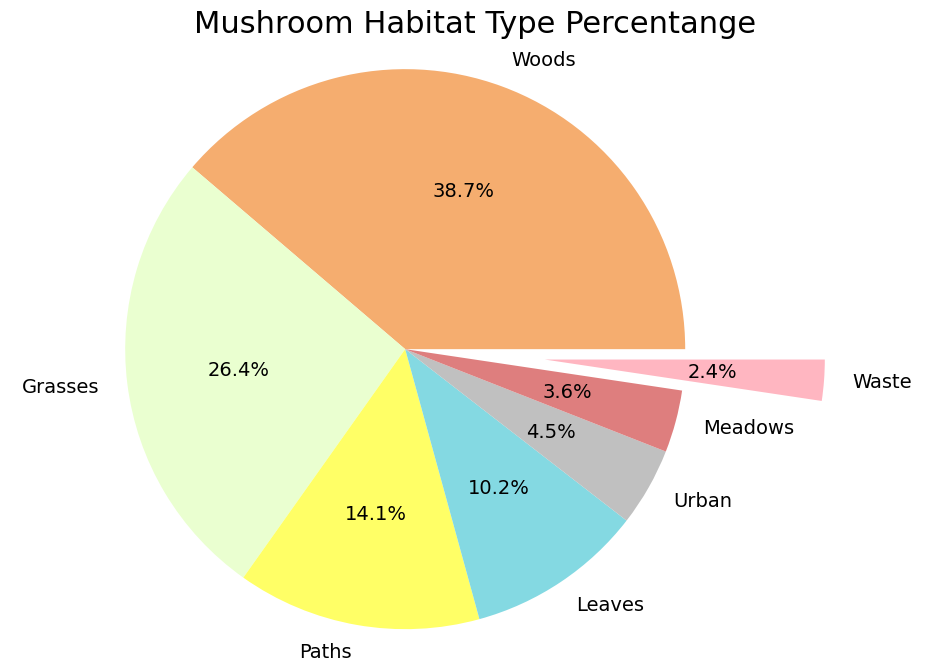

In [56]:
#Get the habitat types and its values for a Single Pie chart
habitats = df['habitat'].value_counts()
hab_size = habitats.values.tolist() #Provides numerical values
hab_types = habitats.axes[0].tolist() #Converts index labels object to list
print(habitats)
# Data to plot
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

[1880, 1408, 136, 240, 96, 256, 192]
[1268, 740, 1008, 592, 272, 36, 0]
[1880, 1268, 1408, 740, 136, 1008, 240, 592, 96, 272, 256, 36, 192, 0]


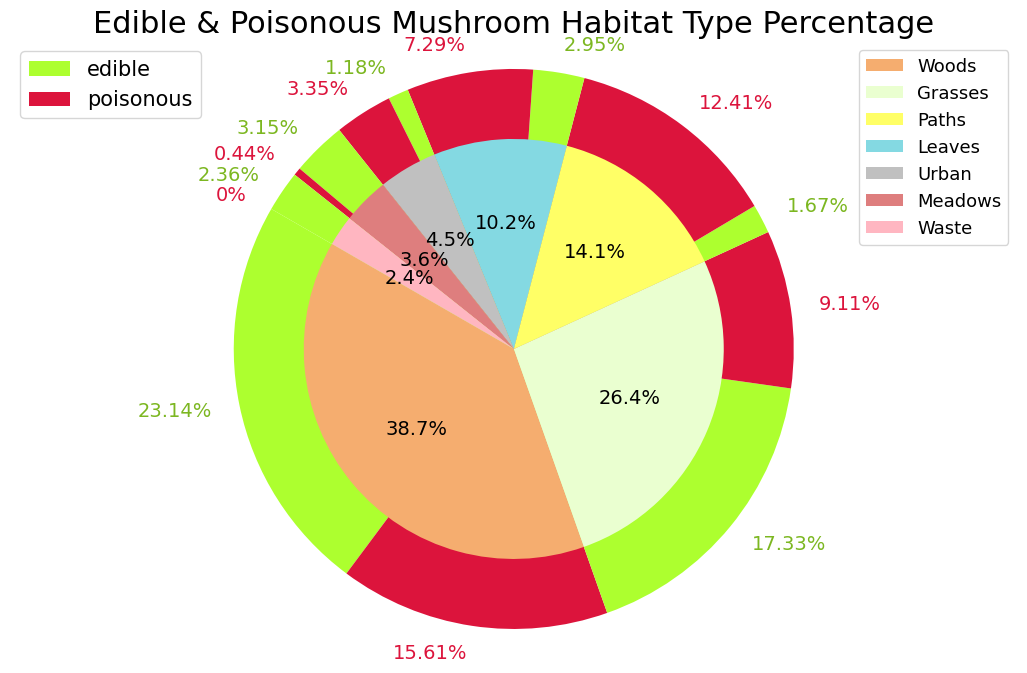

In [58]:
#DOUBLE PIE CHART
poisonous_hab = [] #Poisonous habitat type list
edible_hab = []    #Edible habitat type list
for hab in hab_types: 
    size = len(df[df['habitat'] == hab].index)
    edibles = len(df[(df['habitat'] == hab) & (df['class'] == 'e')].index)
    edible_hab.append(edibles) #Gets edibles
    poisonous_hab.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_hab)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])
print(edible_hab) 
print(poisonous_hab) 
print(combine_ed_poi)

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Habitat Type Percentage', fontsize=22)
percentages_e_p = ['23.14%','15.61%','17.33%', '9.11%','1.67%','12.41%','2.95%','7.29%','1.18%','3.35%',
                  '3.15%','0.44%','2.36%','0%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['#ADFF2F','#DC143C'], startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') #Color % labels with dark green
    else:
        texts1[i].set_color('#DC143C') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(hab_size, colors=colors, radius = 1.5,
        autopct='%1.1f%%', startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, hab_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64


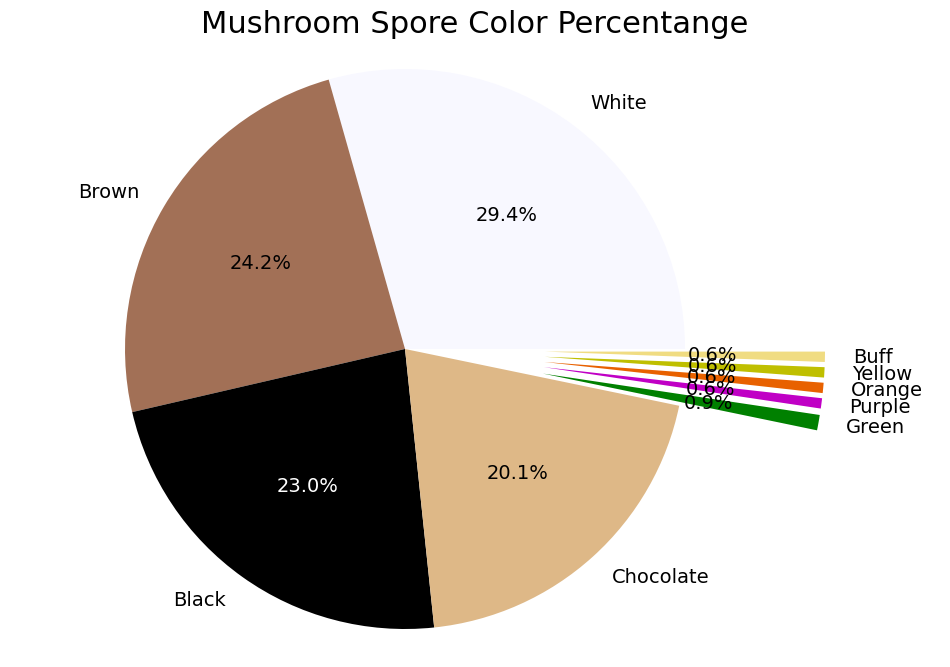

In [60]:
#Get the habitat types and its values for a Single Pie chart
spore_print_color = df['spore-print-color'].value_counts()
# spore_print_color_names = df['spore-print-color'].value_counts()
spore_print_color_size = spore_print_color.values.tolist() #Provides numerical values
spore_print_color_types = spore_print_color.axes[0].tolist() #Converts index labels object to list
print(spore_print_color)
# print(spore_print_color_names)
# Data to plot
spore_print_color_labels = 'White', 'Brown', 'Black', 'Chocolate', 'Green', 'Purple', 'Orange', 'Yellow', 'Buff'
colors = ['#f8f8ff','#a27056','k','#DEB887','g','#C000C5', '#e86100','y','#F0DC82']    
    
explode = (0, 0, 0, 0, 0.5, 0.5,0.5,0.5,0.5)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Spore Color Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(spore_print_color_size, explode=explode, labels=spore_print_color_labels, colors=colors,
        autopct='%1.1f%%', startangle=360)
label_colors = ['black', 'black', 'white', 'black', 'black', 'black', 'black', 'black', 'black']
counter = 0
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)
    autotext.set_color(label_colors[counter])
    counter+=1

plt.axis('equal')
plt.show()

[576, 1744, 1648, 48, 0, 48, 48, 48, 48]
[1812, 224, 224, 1584, 72, 0, 0, 0, 0]
[ 7.0901034  22.3042836  21.46725751  2.75726243 20.28557361  2.75726243
  0.59084195 19.49778434  0.          0.88626292  0.59084195  0.
  0.59084195  0.          0.59084195  0.          0.59084195  0.        ]


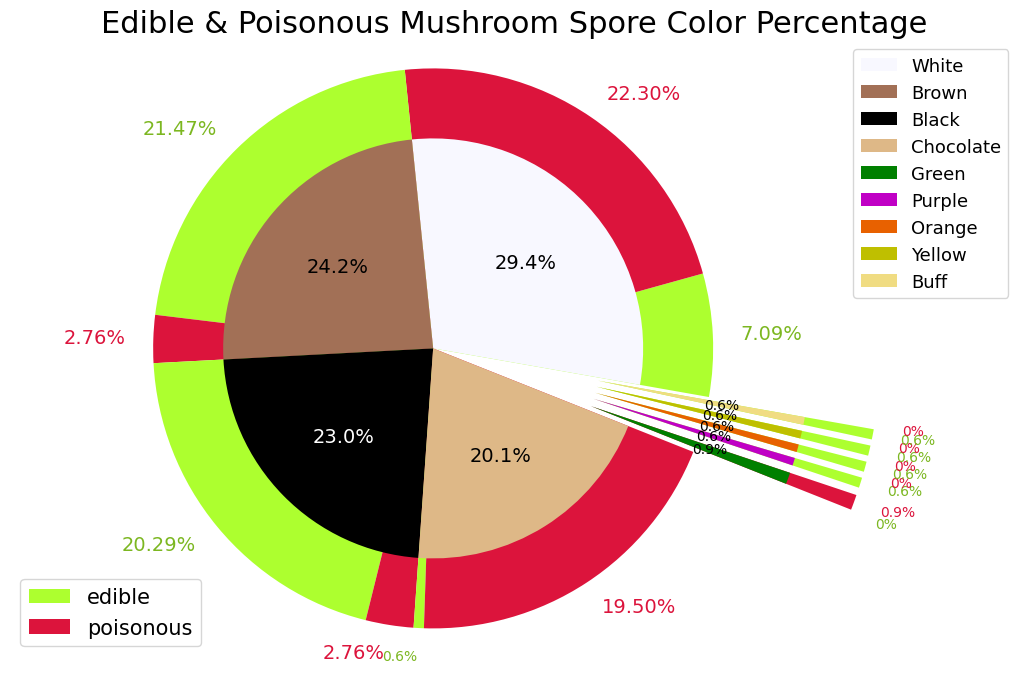

In [62]:
#DOUBLE PIE CHART
poisonous_spore_col = [] #Poisonous habitat type list
edible_spore_col = []    #Edible habitat type list
for spore_col in spore_print_color_types: 
    size = len(df[df['spore-print-color'] == spore_col].index)
    edibles = len(df[(df['spore-print-color'] == spore_col) & (df['class'] == 'e')].index)
    edible_spore_col.append(edibles) #Gets edibles
    poisonous_spore_col.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_spore_col)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_spore_col[i])
    combine_ed_poi.append(poisonous_spore_col[i])
print(edible_spore_col) 
print(poisonous_spore_col) 
print(combine_ed_poi/np.sum(combine_ed_poi)*100)

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Spore Color Percentage', fontsize=22)
percentages_e_p = ['7.09%', '22.30%', '21.47%', '2.76%', '20.29%', '2.76%', '0.6%', '19.50%',\
'0%', '0.9%', '0.6%', '0%', '0.6%', '0%', '0.6%', '0%', '0.6%', '0%'] #Percetanges for edible and poisonous

  
# First pie
explode = (0, 0, 0, 0, 0, 0,0,0,1.2,1.2, 1.2, 1.2, 1.2, 1.2, 1.2,1.2,1.2,1.2)  # explode 1st slice
patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['#ADFF2F','#DC143C'], startangle=350,explode=explode)
font_size = [14,14,14,14,14,14,10,14,10,10,10,10,10,10,10,10,10,10]
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') #Color % labels with green
    else:
        texts1[i].set_color('#DC143C') # " " red
    texts1[i].set_fontsize(font_size[i])
    
# Second pie 
explode = (0, 0, 0, 0, 1.2, 1.2,1.2,1.2,1.2) 
patches2, texts2, autotexts2 = plt.pie(spore_print_color_size, colors=colors, radius = 1.5,
        autopct='%1.1f%%', startangle=350,labeldistance= 2.2,explode=explode)
label_colors = ['black', 'black', 'white', 'black', 'black', 'black', 'black', 'black', 'black']
counter = 0
font_size = [14,14,14,14,10,10,10,10,10]
for aut in autotexts2:
    aut.set_fontsize(font_size[counter])
    aut.set_horizontalalignment('center') #Center
    aut.set_color(label_colors[counter])
    counter+=1
# Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="lower left", fontsize=15)
second_ledgend = plt.legend(patches2, spore_print_color_labels, loc="best",fontsize=13,)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

# I will now perform the label encoding in order to be able to perform the correlation matrix and then I will draw some general conclusions

In [92]:
categorical_features = df.columns[df.dtypes == 'object'].to_list()
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,2.0,5.0,5.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,2.0,5.0,5.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,2.0,5.0,5.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,2.0,1.0,7.0,7.0,2.0,1.0,0.0,7.0,4.0,2.0


In [93]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


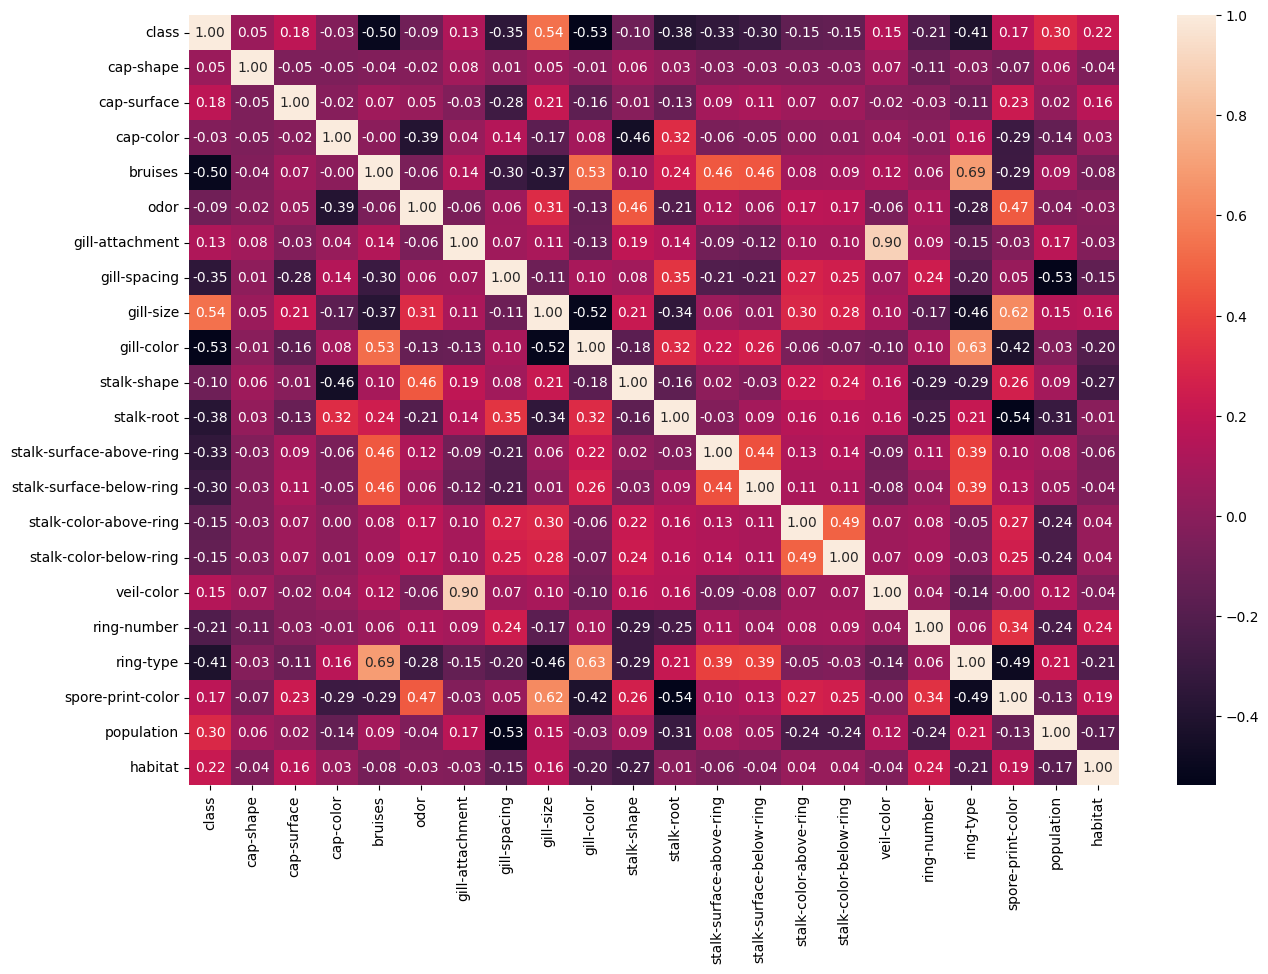

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,fmt = ".2f")
plt.show()

# We have now a more clear picture about the link between classes and features. Some of the classes are really important. However since we have a large number of feature, we could try to perform some dimensionality reduction on the dataframe before building the model. Let's begin with the classical modular structure